# Линейная регрессия (Linear Regression)

### Регрессия - усреднение 

### Формула линейной регрессии y^(с крышкой) = a * x + b
* y - цена дома, которая нам известна
* x - площадь дома
* a - коэффицент, на который умножается площадь
* b - коэффицент, который называется свободным членом

Величина y^ называется прогнозом линейной регрессии

### Суть линейной регрессии как раз в том, чтобы определить наилучшие коэффиценты, чтобы все уравнения решились

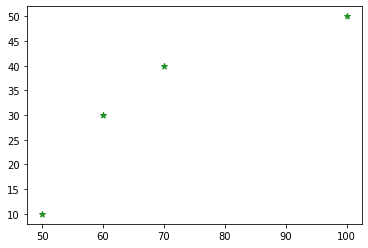

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter([50, 60, 70, 100], [10, 30, 40, 50], 40, 'g', '*', alpha=0.8)
plt.show()

In [4]:
import numpy as np

X = np.array([[1, 50], [1, 60], [1, 70], [1, 100]])
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [5]:
Y = np.array([[10], [30], [40], [50]])
Y

array([[10],
       [30],
       [40],
       [50]])

In [6]:
X_T_X = (X.T).dot(X)
X_T_X

array([[    4,   280],
       [  280, 21000]])

In [7]:
from numpy.linalg import inv
X_T_X_inverted = inv(X_T_X)
X_T_X_inverted

array([[ 3.75000000e+00, -5.00000000e-02],
       [-5.00000000e-02,  7.14285714e-04]])

In [9]:
w = X_T_X_inverted.dot(X.T).dot(Y)
print("w_1=%.5f, w_2=%.3f" % (w[0][0], w[1][0]))

w_1=-17.50000, w_2=0.714


## Наш набор точек, можно описать по формуле
### y = 17.5 + 0.714 * x

# Метрики качества линейной регрессии

## MAE - Mean absolute error - Средняя абсолютная ошибка

from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(reg.predict(features), y))
#### Это сумма модулей из истинного значения минус прогноз на количество предсказаний

### RMSE - Root Mean Square Error - Среднеквадратическое отклонение

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true, y_pred)

print('RMSE = %s' %rmse

RMSE сильнее штрафует за ошибки, чем MAE. RMSE лучше применять, когда есть уверенность, что в данных нет выбросов.

### R^2 (Коэффицент детерминации)

Основная особенность - наилучшее значение 1, а не 0 как у MAE и RMSE. Чем выше - тем лучше. Если этот коэффицент близок к 1

то условная дисперсия модели (то есть разброс предсказаний модели относительно разброса самой целевой переменной)

достаточно мала - то есть модель неплохо описывает данные. Коэффицент может быть даже отрицательным - это означает

что модель совсем уж плоха.

Эта метрика хороша тем, что она нормализирована, то есть не превышает единицу. Удобно сравнивать разные модели.

from sklearn.metrics import r2_score

print("r2_score = %s" % r2_score(y_true, y_pred))

# Трансформация входных данных для линейной регрессии

В алгоритмах машинного обучения и анализа данных часто встречаются требования к входным данным
* распределение данных (имеется в виду вероятностное распределение - например, гауссовское или пуассоновское)
* масштаб данных

Важно: трансформация может применяться как к фичам, так и к целевым переменным

В задачах линейной регрессии такие трансформации особенно важны - чтобы линейная регрессия хорошо работала должны выполняться следующие требования:  
* остатки регрессии должны иметь нормальное (гауссово) распределение (это можно проверить построив гистограмму через matplotlib)
* все фичи должны быть примерно в одном масштабе

При подготовке применяются следующие приёмы:
* масштрабирование 
* нормализация

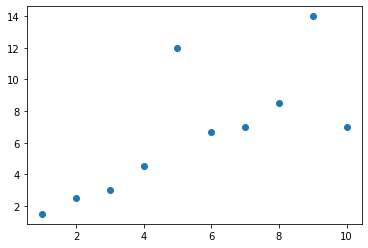

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(1, 10, num=10).reshape(-1, 1)
y = [1.5, 2.5, 3, 4.5, 12, 6.7, 7, 8.5, 14, 7]

plt.scatter(x, y)
plt.show()

## Применим линейную регрессию 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

print(r2_score(y, y_pred))

0.5221932366140851


## Логарифмирование
Теперь трансформируем наши точки с помощью функции логарифмирования .log()

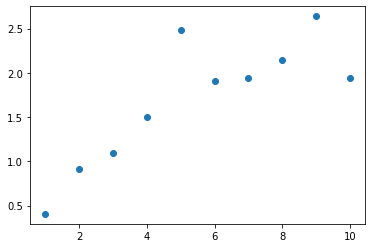

In [15]:
y_transformed = np.log(y)

plt.scatter(x, y_transformed)
plt.show()

reg = LinearRegression().fit(x, y_transformed)
y_pred = reg.predict(x)
print(r2_score(y_transformed, y_pred))

#### Логарифмирование улучшило прогноз модели

Для борьбы с большими по модулю значениями, которые являются выбросами обычно используют:
* логарифмирование np.log
* извлечение квадратного корня np.sqrt

Оба эти преобразования являются монотонными, т.е. они меняют абсолютные значения, но сохраняют порядок величин.

Пример немонотонного преобразования для величины x - функция sin x. В задачах линейной регрессии не применяются, 

но применяются в задачах по анализу временных рядов

## Z-Score 

Метод Standart Scaling или Z-score normalization. Это преобразование позволяет "сгладить" данные, избавить их от выбросов.

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [21]:
raw_data = np.array([1., 3., 2., 4., 2., 10., 2.,5.,2.,2.,1.,7.,5.,2.,5.,16.,10.,3.,24.], dtype=np.float32)
print("Сырой датасет: %s" %raw_data[:6])
transformed_data = StandardScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print("z-transform датасет: %s" % transformed_data[:6])

Сырой датасет: [ 1.  3.  2.  4.  2. 10.]
z-transform датасет: [-0.7986022  -0.4497874  -0.6241948  -0.27538007 -0.6241948   0.7710641 ]


## min-max normalization
Другой распространённый метод называется MinMax Scaling. Это метод переносит все точки на отрезок [0-1]

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
print("Сырой датасет: %s" %raw_data[:6])
transformed_data = MinMaxScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print("Min-Max scale датасет: %s" % transformed_data[:6])

Сырой датасет: [ 1.  3.  2.  4.  2. 10.]
Min-Max scale датасет: [0.         0.08695652 0.04347826 0.13043478 0.04347826 0.39130437]


## Алгоритм действий при применении линейной регрессии
* построить модель
* вычислить метрику качества
* выполнить преобразование
* снова вычислить метрику качества
* если метрика качества выросла - применять найденную трансформацию ко входным данным перед тем, как подавать на вход модели

# Полиномиальная регрессия

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
x = np.linspace(-10, 10, num=100)

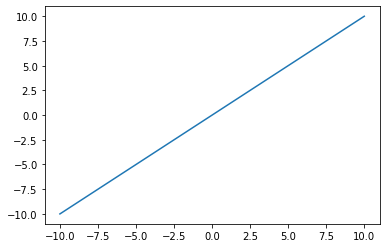

In [32]:
y = x
plt.plot(x, y)
plt.show()

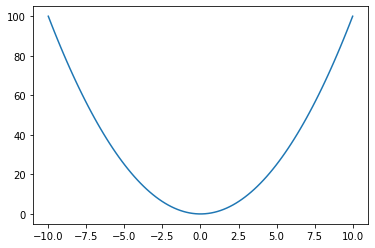

In [34]:
plt.plot(x, y**2)
plt.show()

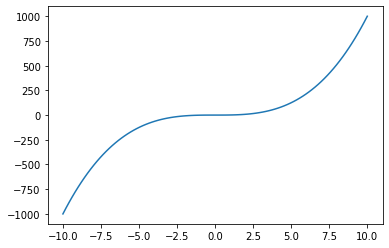

In [35]:
plt.plot(x, y**3)
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = pd.read_csv('3.10_non_linear.csv')

In [5]:
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


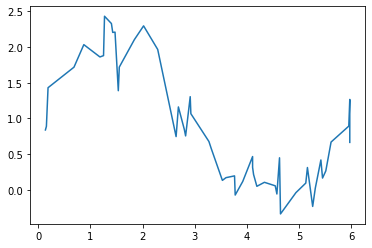

In [7]:
plt.plot(data['x_train'], data['y_train'])
plt.show()

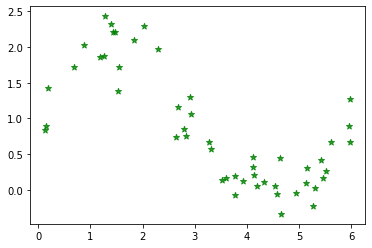

In [8]:
margin = 0.3
plt.scatter(data.x_train, data.y_train, 40, 'g', '*', alpha=0.8, label='data')

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data[['x_train']], data.y_train)
y_hat = reg.predict(data[['x_train']])

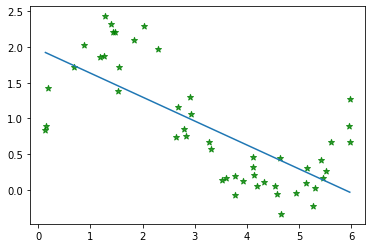

In [10]:
plt.scatter(data.x_train, data.y_train, 40, 'g', '*', alpha=0.8, label='data')
plt.plot(data.x_train, y_hat)
plt.show()

In [11]:
#Функция принимает на вход одномерный массив и степень, а возвращает n-мерный
def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree + 1)]).T

In [13]:
X = generate_degrees(data.x_train, 5)

In [15]:
X.shape

(50, 5)

In [18]:
from sklearn.metrics import mean_squared_error

def train_polynomial(degree, data):
    X = generate_degrees(data['x_train'], 5)
    model = LinearRegression().fit(X, data.y_train)
    y_pred = model.predict(X)
    error = mean_squared_error(data.y_train, y_pred)
    print("Степень полинома %d Ошибка %.3f" % (degree, error))
    plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data.x_train, y_pred)
    plt.show()

In [19]:
q = train_polynomial(5, X)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices